In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm

def random_frame_plotter(images, rows=5, cols=5):
    np.random.seed(42)
    indices = np.random.choice(images.shape[0], size=rows*cols, replace=False)
    fig, axes = plt.subplots(rows, cols, figsize=(14, 10))
    
    for ax, idx in zip(axes.flat, indices):
        im = ax.imshow(images[idx])
        ax.axis('off') 
        ax.set_title(f"Frame {idx}", fontsize=8)
        fig.colorbar(im, ax=ax)
    plt.show()

def vmax_random_frame_plotter(images, rows=5, cols=5):
    np.random.seed(42)
    indices = np.random.choice(images.shape[0], size=rows*cols, replace=False)
    fig, axes = plt.subplots(rows, cols, figsize=(14, 10))
    
    for ax, idx in zip(axes.flat, indices):
        im = ax.imshow(images[idx], vmin=0, vmax=30)
        ax.axis('off') 
        ax.set_title(f"Frame {idx}", fontsize=8)
        fig.colorbar(im, ax=ax)
    plt.show()

def aqi_random_frame_plotter(images, rows=5, cols=5):
    np.random.seed(42)
    #https://metone.com/how-to-calculate-aqi-and-nowcast-indices
    aqi_colors = [
        "#00e400",  # Good
        "#ffff00",  # Moderate
        "#ff7e00",  # Unhealthy for Sensitive Groups
        "#ff0000",  # Unhealthy
        "#8f3f97",  # Very Unhealthy
        "#7e0023",  # Hazardous
    ]

    # Define AQI breakpoints
    aqi_bounds = [0, 12.1, 35.5, 55.5, 150.5, 250.5, 350.5]
    
    # Create colormap and norm
    cmap = ListedColormap(aqi_colors)
    norm = BoundaryNorm(aqi_bounds, cmap.N)
    
    indices = np.random.choice(images.shape[0], size=rows*cols, replace=False)
    fig, axes = plt.subplots(rows, cols, figsize=(14, 10))
    
    for ax, idx in zip(axes.flat, indices):
        im = ax.imshow(images[idx], cmap=cmap, norm=norm)
        ax.axis('off') 
        ax.set_title(f"Frame {idx}", fontsize=8)
        fig.colorbar(im, ax=ax)
    plt.show()


def straight_frame_plotter(images, idx, rows=2, cols=5):
    '''
    plots the 5 frames surrounding the image
    '''
    np.random.seed(42)
    indices = range(idx-5, idx+5)
    fig, axes = plt.subplots(rows, cols, figsize=(14, 5))
    
    for ax, idx in zip(axes.flat, indices):
        im = ax.imshow(images[idx], vmin=0, vmax=30)
        ax.axis('off') 
        ax.set_title(f"Frame {idx}", fontsize=8)
        fig.colorbar(im, ax=ax, shrink=0.8)
    plt.show()

In [2]:
import sys
sys.path.append('/home/mgraca/Workspace/hrrr-smoke-viz')
from libs.airnowdata import AirNowData
cache_dir = '/home/mgraca/Workspace/hrrr-smoke-viz/pwwb-experiments/tensorflow/cached_data'
airnow_cache_dir = f'{cache_dir}/two_years_sat_data/airnow_cache'

'''
airnow = AirNowData(
    save_dir='/home/mgraca/Workspace/hrrr-smoke-viz/pwwb-experiments/tensorflow/cached_data/two_years_sat_data/airnow_cache/airnow.json',
    elevation_path='/home/mgraca/Workspace/hrrr-smoke-viz/pwwb-experiments/tensorflow/data/elevation.npy',
    processed_cache_dir='/home/mgraca/Workspace/hrrr-smoke-viz/pwwb-experiments/tensorflow/data/airnow_cache/airnow_processed.npz'
)
'''
airnow = AirNowData(
    save_dir=f'{airnow_cache_dir}/airnow.json',
    elevation_path=f'{cache_dir}/two_years_sat_data/elevation.npy',
    processed_cache_dir=f'{airnow_cache_dir}/elevation_scale/airnow_processed_0.npz',
    elevation_scale_factor=0
)

/home/mgraca/miniconda3/envs/hrrrenv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


⛰️  Elevation data statistics:
  mean:   0.00
  std:    0.00
  median: 0.00
  min:    0.00
  max:    0.00

Mask usage disabled. All sensors within extent will be included.
Found existing file '/home/mgraca/Workspace/hrrr-smoke-viz/pwwb-experiments/tensorflow/cached_data/two_years_sat_data/airnow_cache/airnow.json'. Checking if download is complete...
Latest data in file: 2025-08-01 23:00:00
Target end date: 2025-08-01 23:00:00
Download appears complete. Using existing file.
Loading AirNow data from /home/mgraca/Workspace/hrrr-smoke-viz/pwwb-experiments/tensorflow/cached_data/two_years_sat_data/airnow_cache/airnow.json...
Removing sensors with low uptime, imputing invalid sensor data, imputing non-reporting sensors, imputing outliers, and fillings all gaps with forward/backward fill
Plotting sensor data onto grid...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17544/17544 [00:04<00:00, 3511.45it/s]


Performing IDW interpolation on 17544 frames...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17544/17544 [04:38<00:00, 63.09it/s]


Saving processed AirNow data to cache: /home/mgraca/Workspace/hrrr-smoke-viz/pwwb-experiments/tensorflow/cached_data/two_years_sat_data/airnow_cache/elevation_scale/airnow_processed_0.npz
✓ Successfully saved processed data to cache


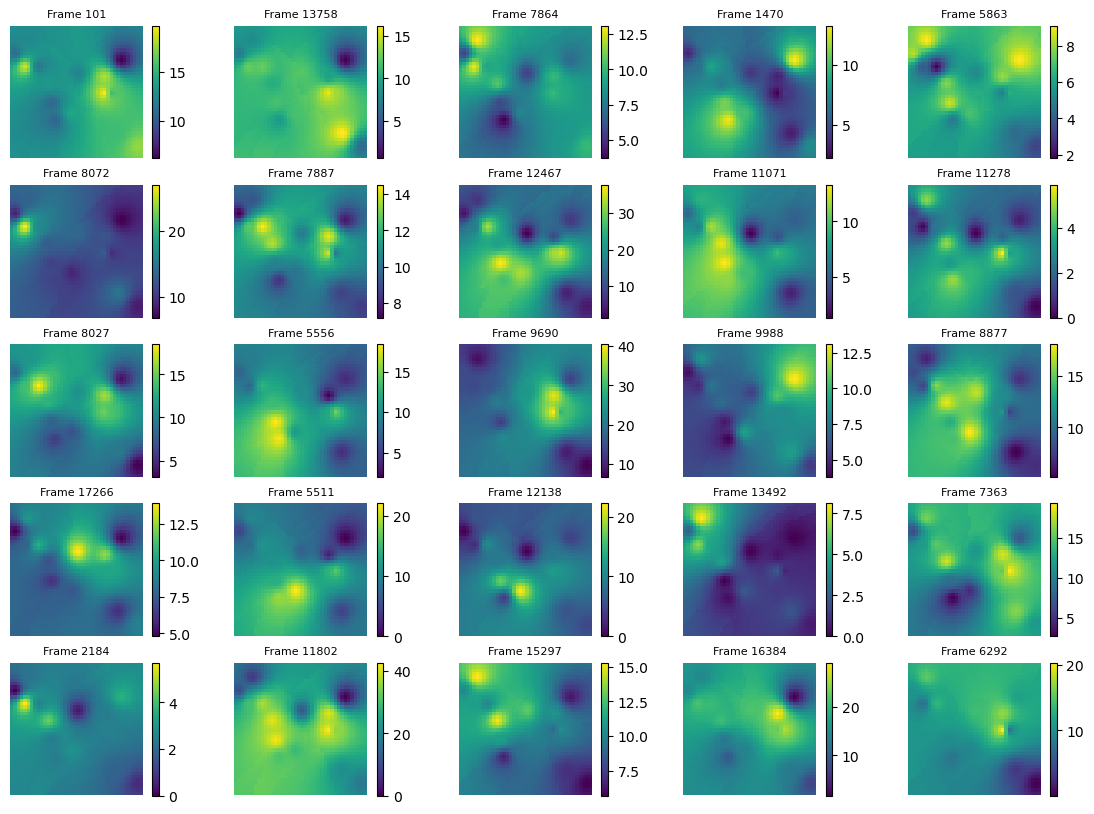

In [3]:
random_frame_plotter(airnow.data)

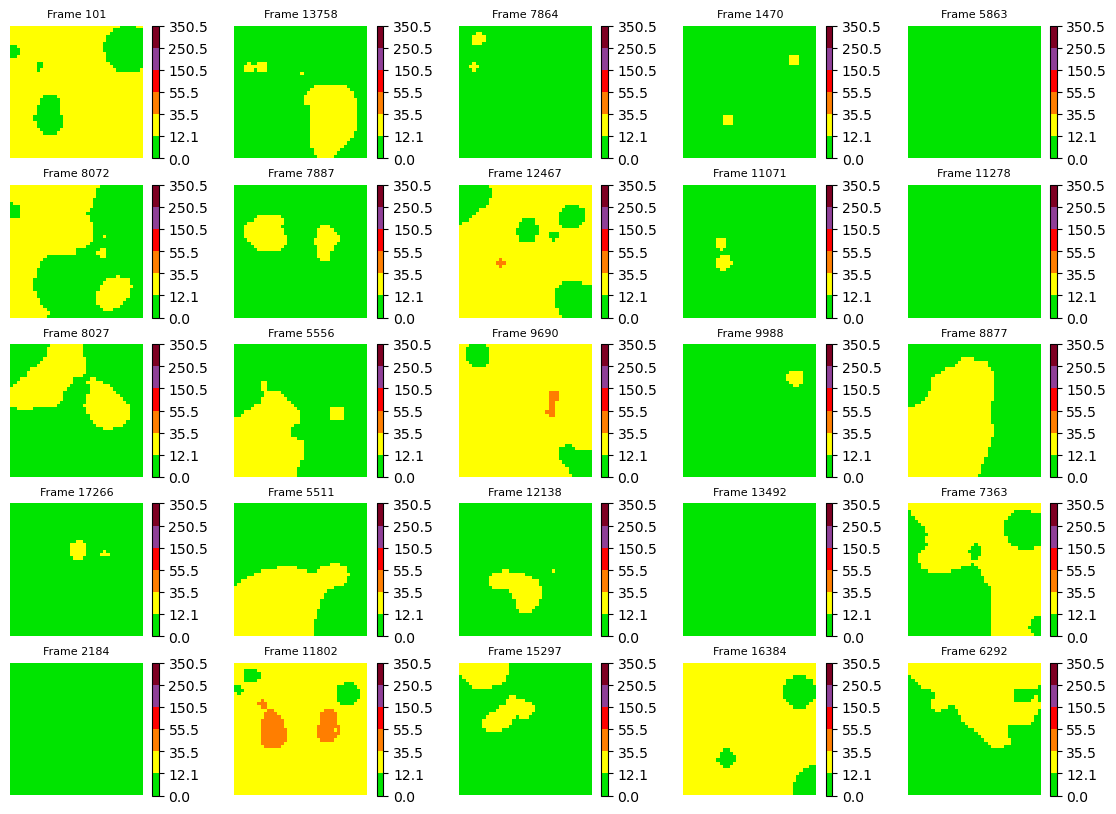

In [4]:
aqi_random_frame_plotter(airnow.data)

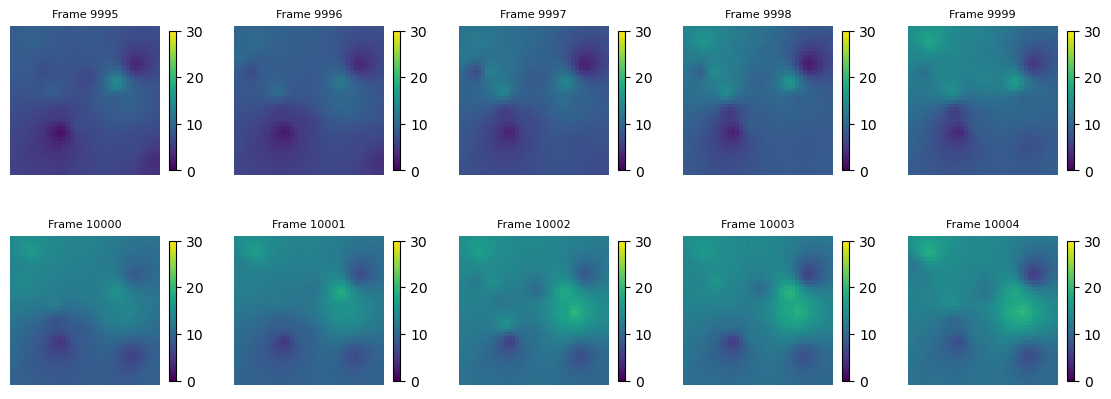

In [5]:
straight_frame_plotter(airnow.data, 10000)